In [1]:
import numpy as np
from ProbabilisticMeasurement import ProbabilisticMeasurement
import qiskit
from qiskit import *

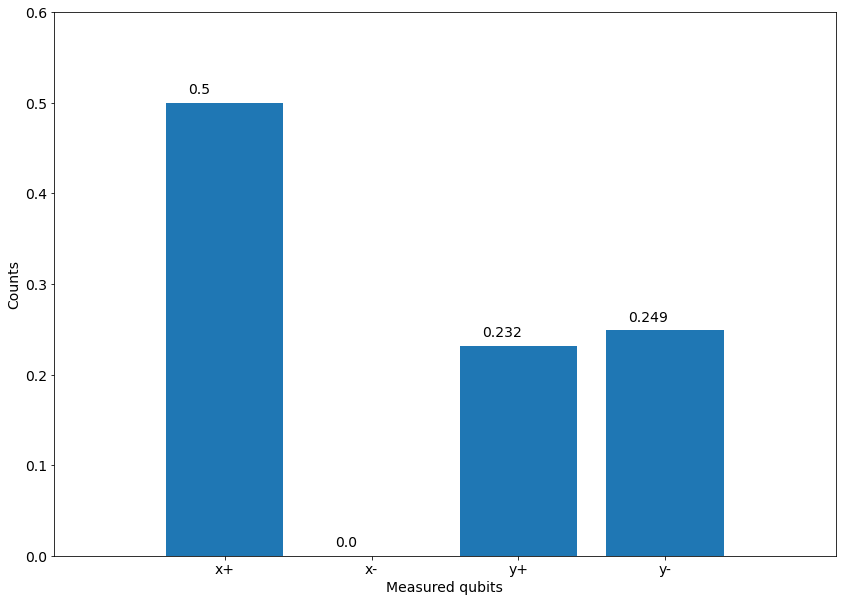

In [4]:
# from qiskit import IBMQ
# IBMQ.load_account()
# dev = IBMQ.get_provider().get_backend("ibmq_manila")

povm_basic = [
    np.array([[1/2, 1/2],
              [1/2, 1/2]]),
    np.array([[1/2, -1/2],
              [-1/2, 1/2]]),
    np.array([[1/2, 0+(-1j/2)],
              [0+(1j/2), 1/2]]),
    np.array([[1/2, 0+(1j/2)],
              [0+(-1j/2), 1/2]]),
    np.array([[1, 0],
              [0, 0]]),
    np.array([[0, 0],
              [0, 1]])
]

qasm = qiskit.Aer.get_backend("qasm_simulator")

effects = [0, 1, 2, 3]
n = len(effects)
povm_effects = [2 * povm_basic[j] / n for j in effects]

# Initialize the object using POVM effects and assign labels to them
prob = ProbabilisticMeasurement(povm_effects, ["x+", "x-", "y+", "y-"])

# Prepare measured state
state = QuantumCircuit(1, 1)
state.h(0)

results = prob.measure(state, backend=qasm)

prob.plot_histogram(results)